In [578]:
import pdb
from lxml import html
import requests
import pyquery
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

%matplotlib inline

In [547]:
path_data = '../data/'
file_master_list = path_data+'master_player_list.csv'

In [583]:
class player_profile:
    def __init__(self, file_master_list):
        
        players_list = pd.read_csv(file_master_list)
        full_names = [str(i).split() for i in players_list.fg_name.values]
        first_names = []
        last_names = []
        for i in range(len(full_names)):
            if full_names[i][0] != 'nan':
                first_names.append(full_names[i][0])
                last_names.append(full_names[i][1])
            else: 
                first_names.append('nan')        
                last_names.append('nan')
        players_list['first_name'] = first_names
        players_list['last_name'] = last_names
        
        self.master_list = players_list
        
    def get_fg_id(self, full_name=None,first_name=None,last_name=None):
        if (full_name == None):
            fangraphs_id = self.master_list.fg_id[(self.master_list.first_name.values == first_name) & 
                                                  (self.master_list.last_name.values == last_name)].values
        else:
            fangraphs_id = self.master_list.fg_id[(master_list.mlb_name.values == full_name)]
        
        return fangraphs_id
        
    def get_player_info_w_id(self,fangraphs_id, info = None):
        if (info == None):
            out = self.master_list[self.master_list.fg_id == fangraphs_id]
            return out
        else:
            out = self.master_list[info][self.master_list.fg_id == fangraphs_id]
            return out.values
        
    def get_player_info(self,info=None,full_name=None,first_name=None,last_name=None):
        #pdb.set_trace()
        if (full_name == None):
            tid = self.get_fg_id(first_name=first_name,last_name=last_name)
        else:
            tid = self.get_fg_id(full_name=full_name)
        return self.get_player_info_w_id(tid[0],info=info)[0]

In [584]:
league = player_profile(file_master_list)

In [585]:
league.get_fg_id(first_name='Marcus',last_name='Stroman')

array(['13431'], dtype=object)

In [586]:
league.get_player_info(first_name='Marcus',last_name='Stroman',info='mlb_pos')

'P'

In [215]:
def pitch_placement(heatmap):
    pitch = False
    while pitch == False:
        location = random.randint(0,len(heatmap)-1)
        prob = np.random.uniform(np.min(heatmap),np.max(heatmap))
        if prob < heatmap[location]: pitch = True  
    return location

In [ ]:
def pitch_type():
    

In [515]:
def get_fg_id(master_list, full_name=None,first_name=None,last_name=None):
    if (full_name == None):
        fangraphs_id = master_list.fg_id[(master_list.first_name.values == first_name) & 
                                          (master_list.last_name.values == last_name)].values
    else:
        fangraphs_id = master_list.fg_id[(master_list.mlb_name.values == full_name)]
        
    return fangraphs_id

In [540]:
def get_player_info_w_id(master_list,fangraphs_id, info = None):
    if (info == None):
        out = master_list[master_list.fg_id == fangraphs_id]
        return out
    else:
        #print info
        out = master_list[info][master_list.fg_id == fangraphs_id]
        return out.values

In [543]:
#print get_fg_id(full_name='Joey Votto')
#votto_id = get_fg_id(players_list,first_name='Joey', last_name='Votto')
print get_player_info_w_id(players_list,votto_id[0],'mlb_pos')#.values
#print votto_id

['1B']


In [512]:
print players_list.keys()
print votto_id
print players_list['bats'][players_list.fg_id == votto_id[0]].values

Index([u'mlb_id', u'mlb_name', u'mlb_pos', u'mlb_team', u'mlb_team_long',
       u'bats', u'throws', u'birth_year', u'bp_id', u'bref_id', u'bref_name',
       u'cbs_id', u'cbs_name', u'cbs_pos', u'espn_id', u'espn_name',
       u'espn_pos', u'fg_id', u'fg_name', u'lahman_id', u'nfbc_id',
       u'nfbc_name', u'nfbc_pos', u'retro_id', u'retro_name', u'debut',
       u'yahoo_id', u'yahoo_name', u'yahoo_pos', u'mlb_depth', u'first_name',
       u'last_name'],
      dtype='object')
['4314']
['L']


In [412]:
#from http://crunchtimebaseball.com/baseball_map.html
#updates every day, so probably worth automizing that..
path_data = '../data/'
file_master_list = 'master_player_list.csv'
players_list = pd.read_csv(file_master_list)
full_names = [str(i).split() for i in players_list.fg_name.values]
first_names = []
last_names = []
for i in range(len(full_names)):
    if full_names[i][0] != 'nan':
        first_names.append(full_names[i][0])
        last_names.append(full_names[i][1])
    else: 
        first_names.append('nan')        
        last_names.append('nan')
#last_names = [players_list.fg_name[i] for i in range(len(players_list))]
players_list['first_name'] = first_names
players_list['last_name'] = last_names

In [386]:
players_list

,mlb_id,mlb_name,mlb_pos,mlb_team,mlb_team_long,bats,throws,birth_year,bp_id,bref_id,...,nfbc_pos,retro_id,retro_name,debut,yahoo_id,yahoo_name,yahoo_pos,mlb_depth,first_names,last_names
0,592091,A.J. Achter,P,LAA,Los Angeles Angels,R,R,1988,66919,achteaj01,...,P,achta001,A.J. Achter,9/3/2014,9824.0,A.J. Achter,RP,NaN,A.J.,Achter
1,150359,A.J. Burnett,P,PIT,Pittsburgh Pirates,R,R,1977,493,burnea.01,...,P,burna001,A.J. Burnett,8/17/1999,6314.0,A.J. Burnett,SP,NaN,A.J.,Burnett
2,595918,A.J. Cole,P,WSH,Washington Nationals,R,R,1992,68086,coleaj01,...,P,colea002,A.J. Cole,4/28/2015,9638.0,A.J. Cole,RP/SP,SP6,A.J.,Cole
3,454560,A.J. Ellis,C,MIA,Miami Marlins,R,R,1981,47564,ellisaj01,...,C,ellia001,A.J. Ellis,9/15/2008,8373.0,A.J. Ellis,C,C2,A.J.,Ellis
4,456167,A.J. Griffin,P,TEX,Texas Rangers,R,R,1988,65757,griffaj01,...,P,grifa002,A.J. Griffin,6/24/2012,9220.0,A.J. Griffin,SP,SP5,A.J.,Griffin
5,543362,A.J. Jimenez,C,TOR,Toronto Blue Jays,R,R,1990,58320,NaN,...,NaN,NaN,NaN,2/2/2222,NaN,NaN,NaN,C2,A.J.,Jimenez
6,571963,A.J. Morris,P,CIN,Cincinnati Reds,R,R,1986,60630,morriaj01,...,P,morra002,A.J. Morris,5/24/2016,10301.0,A.J. Morris,RP,NaN,A.J.,Morris
7,150229,A.J. Pierzynski,C,ATL,Atlanta Braves,L,R,1976,1501,pierza.01,...,C,piera001,A.J. Pierzynski,9/9/1998,6109.0,A.J. Pierzynski,C,NaN,A.J.,Pierzynski
8,572041,A.J. Pollock,CF,ARI,Arizona Diamondbacks,R,R,1987,60932,polloaj01,...,CF,polla001,A.J. Pollock,4/18/2012,9157.0,A.J. Pollock,CF,CF1,A.J.,Pollock
9,573109,A.J. Ramos,P,MIA,Miami Marlins,R,R,1986,60504,ramosaj01,...,P,ramoa001,A.J. Ramos,9/4/2012,9298.0,A.J. Ramos,RP,RP1,A.J.,Ramos


In [6]:
print players_list.keys()[17] # fg_id -- Fangraphs ID
print players_list.values[:,18] # fg_name -- Fangraphs ID

fg_id
['A.J. Achter' 'A.J. Burnett' 'A.J. Cole' ..., 'Zeke Spruill'
 'Zelous Wheeler' 'Zoilo Almonte']


In [262]:
print players_list.keys()
#print players_list.fg_id[players_list.mlb_pos == 'P']
players_list.fg_name[players_list.mlb_pos == 'P'].values[0].split()[0]

Index([u'mlb_id', u'mlb_name', u'mlb_pos', u'mlb_team', u'mlb_team_long',
       u'bats', u'throws', u'birth_year', u'bp_id', u'bref_id', u'bref_name',
       u'cbs_id', u'cbs_name', u'cbs_pos', u'espn_id', u'espn_name',
       u'espn_pos', u'fg_id', u'fg_name', u'lahman_id', u'nfbc_id',
       u'nfbc_name', u'nfbc_pos', u'retro_id', u'retro_name', u'debut',
       u'yahoo_id', u'yahoo_name', u'yahoo_pos', u'mlb_depth'],
      dtype='object')


'A.J.'

In [563]:
fangraphs_id = players_list.fg_id[(players_list.first_name.values == 'A.J.')& (players_list.last_name.values == 'Burnett')].values
fangraphs_id = players_list.fg_id[(players_list.first_name.values == 'Marcus')& (players_list.last_name.values == 'Stroman')].values
print fangraphs_id

['13431']


In [405]:
players_list.first_names[78]

'Alex'

In [8]:
#AJ Burnett
url = 'http://www.fangraphs.com/zonegrid.aspx?playerid=512&position=P&ss=&se=&type=0&hand=all&count=all&blur=0&grid=5&view=pit&pitch=&season=2015'

In [559]:
def pitch_heatmap_url(playerid, pitch='', hand='all', count='all', season='2016'):
    url0 = 'http://www.fangraphs.com/zonegrid.aspx?'
    pid_suf  = 'playerid=' + str(playerid)+'&'
    pos_suf  = 'position=P&'
    ss_suf   = 'ss=&se=&'
    type_suf = 'type=0&'
    hand_suf = 'hand='+str(hand)+'&'
    count_suf= 'count='+str(count)+'&'
    blur_suf = 'blur=0&'
    grid_suf = 'grid=5&'
    view_suf = 'view=pit&'
    pitch_suf= 'pitch='+pitch+'&'
    season_suf= 'season='+str(season)
    
    url=url0+pid_suf+pos_suf+ss_suf+type_suf+hand_suf+count_suf+blur_suf+grid_suf+view_suf+pitch_suf+season_suf
    
    return url

In [564]:
print pitch_heatmap_url(13431,season=2015)

http://www.fangraphs.com/zonegrid.aspx?playerid=13431&position=P&ss=&se=&type=0&hand=all&count=all&blur=0&grid=5&view=pit&pitch=&season=2015


In [9]:
page = requests.get(url)

In [10]:
tree = html.fromstring(page.content)

In [11]:
heats = tree.xpath('//div[@class="hzstat"]/text()')
Npitch = tree.xpath('//div[@class="hzdem"]/text()')

In [12]:
len(Npitch)

25

In [13]:
heat1d = [float(i.split()[0]) for i in heats]
Npitch1d = [float(i.split()[0]) for i in Npitch]

In [14]:
heatmap = np.reshape(heat1d,[5,5])
pitchmap = np.reshape(Npitch1d,[5,5])

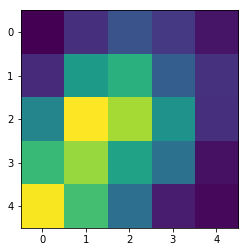

In [15]:
plt.imshow(heatmap)

In [216]:
pitch_locations = np.zeros(len(heat1d))
nsamp = 10000.
for i in np.arange(nsamp):
    pitch_locations[pitch_placement(heat1d)] += 1    

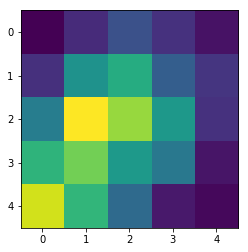

In [217]:
plt.imshow(np.reshape(pitch_locations,(5,5)))

In [81]:
import scipy.stats as st
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_bins=40, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

In [43]:
def inverse_transform_sampling_pitches(data, n_samples=1000):
    cum_values = np.cumsum(data)
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

In [31]:
hist, bin_edges = np.histogram(heat1d, density=True)

In [53]:
tst=inverse_transform_sampling(heat1d)
hist, bin_edges = np.histogram(tst, bins=25, density=True)

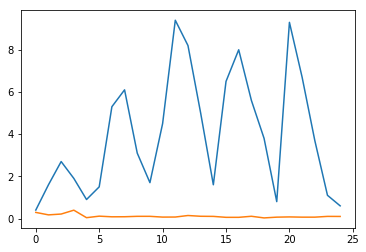

In [54]:
plt.plot(heat1d)
plt.plot(hist)

In [57]:
hist

array([ 0.28903733,  0.17231072,  0.21121959,  0.39464712,  0.03890887,
        0.1111682 ,  0.08059695,  0.08337615,  0.10283059,  0.10283059,
        0.06670092,  0.06948013,  0.14173946,  0.10560979,  0.10005138,
        0.0555841 ,  0.0555841 ,  0.10560979,  0.02779205,  0.06392172,
        0.07503854,  0.06392172,  0.06392172,  0.10005138,  0.09727218])